# 1 - Perkenalan

Nama : Bagus Tirta Aji Hakim

Batch : FTDS-018-RMT

Dataset : [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

Objective : Membuat model klasifikasi untuk memprediksi apakah pelanggan transportasi udara (Airlane) termasuk kategori puas atau netral tidak puas dengan mengurangi kesalahan prediksi pada pelanggan yang terprediksi puas namun kenyatannya tidak puas atau biasa saja, hal ini merujuk pada evaluasi model yang bernama precision


Field Name  | Description
------------- | -------------
`Gender` | Gender of the passengers (Female, Male)
`Customer` | Type The customer type (Loyal customer, disloyal customer)
`Age` | The actual age of the passengers
`Type of Travel` | Purpose of the flight of the passengers (Personal Travel, Business Travel)
`Class` | Travel class in the plane of the passengers (Business, Eco, Eco Plus)
`Flight distance` | The flight distance of this journey
`Inflight wifi service` | Satisfaction level of the inflight wifi service (0Not Applicable;1-5)
`Departure/Arrival time convenient` | Satisfaction level of Departure/Arrival time convenient
`Ease of Online booking` | Satisfaction level of online booking
`Gate location` | Satisfaction level of Gate location
`Food and drink` | Satisfaction level of Food and drink
`Online boarding` | Satisfaction level of online boarding
`Seat comfort` | Satisfaction level of Seat comfort
`Inflight entertainment` | Satisfaction level of inflight entertainment
`On-board service` | Satisfaction level of On-board service
`Leg room service` | Satisfaction level of Leg room service
`Baggage handling` | Satisfaction level of baggage handling
`Check-in service` | Satisfaction level of Check-in service
`Inflight service` | Satisfaction level of inflight service
`Cleanliness` | Satisfaction level of Cleanliness
`Departure Delay in Minutes` | Minutes delayed when departure
`Arrival Delay in Minutes` | Minutes delayed when Arrival
`Satisfaction` | Airline satisfaction level (Satisfaction, neutral or dissatisfaction)

# 2 - Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# 3 - Data Loading

In [2]:
# Load Dataset

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train_copy = train.copy()
test_copy = test.copy()

In [4]:
train.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [5]:
train.tail(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103894,103894,86549,Male,Loyal Customer,26,Business travel,Business,712,4,4,...,5,3,4,4,3,4,5,17,26.0,satisfied
103895,103895,66030,Female,disloyal Customer,24,Business travel,Eco,1055,1,1,...,1,3,3,5,5,4,1,13,10.0,neutral or dissatisfied
103896,103896,71445,Male,Loyal Customer,57,Business travel,Eco,867,4,5,...,4,3,4,3,1,3,4,0,0.0,neutral or dissatisfied
103897,103897,102203,Female,Loyal Customer,60,Business travel,Business,1599,5,5,...,4,4,4,4,4,4,4,9,7.0,satisfied
103898,103898,60666,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,...,2,4,3,4,2,4,2,0,0.0,neutral or dissatisfied
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [6]:
print('Size of data train: ', train.shape)
print('Size of data test: ', test.shape)

Size of data train:  (103904, 25)
Size of data test:  (25976, 25)


In [7]:
# Check Dataset - 1

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

berdasarkan info dataset yang diperoleh dapat dilihat bahwa tipe data yang tertera sudah sesuai dengan data aslinya terdapat missing values pada variabel `Arrival Delay in Minutes`.

In [8]:
# Check Dataset - 2

train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


> dropping unesscary column

In [9]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [10]:
train = train.drop(columns=['Unnamed: 0', 'id'])
test = test.drop(columns=['Unnamed: 0', 'id'])

mengambil beberapa jumlah data saja, karena data yang terlalu besar dapat memperlambat kinerja model

In [11]:
train = train.iloc[1:25001]
test = test.iloc[1:5001]

([<matplotlib.patches.Wedge at 0x26f023a0e80>,
 [Text(-0.21331131749339252, 1.0791192157631302, 'Neutral or dissatisfied'),
  Text(0.21331141852782406, -1.0791191957914785, 'Satisfied')],
 [Text(-0.11635162772366864, 0.5886104813253437, '56.2%'),
  Text(0.11635168283335856, -0.5886104704317155, '43.8%')])

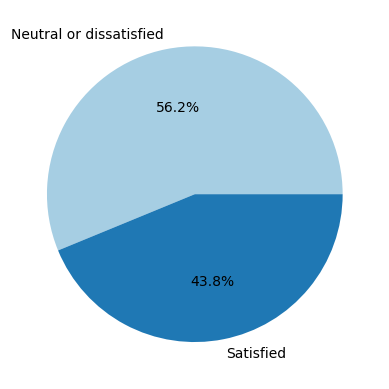

In [12]:
plt.pie(train.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("Paired"), autopct = '%1.1f%%')

# 4 - Exploratory Data Analysis (EDA)

In [13]:
train.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3288
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           5
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            314
Arrival Delay in Minutes              322
satisfaction                            2
dtype: int64

In [14]:
train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Berdasarkan pengecekan unique values dapat disimpulkan sebagai berikut:

1. Unique Columns: `Unnamed: 0`, `id`
2. Numeric Columns: `Age`, `Flight Distance`, `Departure Delay in Minutes`, `Arrival Delay in Minutes`
3. Target: `satisfaction`
4. Categoric Columns: Selain dari kolom yang telah disebutkan di atas

Dari categoric columns, dapat dibagi menjadi dua tipe data categoric yaitu

1. Ordinal: `Inflight wifi service`, `Departure/Arrival time convenient`, `Ease of Online booking`, `Gate location`, `Food and drink`, `Online boarding`, `Seat comfort`, `Inflight entertainment`, `On-board service`, `Leg room service`, `Baggage handling`, `Checkin service`, `Inflight service`, `Cleanliness`
2. Nominal: `Gender`, `Customer Type`, `Type of Travel`, `Class`

## Distribusi Data

In [15]:
numeric = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

train_num = train[numeric]

In [16]:
normal = []
not_normal = []


def getDataDistribution(df, column):
    stat, p = shapiro(df[column])

    # hasil uji normalitas
    alpha = 0.05
    if p > alpha:
        normal.append((column))
        # print("Data terdistribusi normal")
    else:
        not_normal.append((column))
        # print("Data tidak terdistribusi normal")

In [17]:
for column in train_num:
    getDataDistribution(train_num, column)

print(normal)
print(not_normal)

['Arrival Delay in Minutes']
['Age', 'Flight Distance', 'Departure Delay in Minutes']


**Kesimpulan EDA Sederhana**

1. Dataset didominasi oleh data categoric ordinal
2. Berdasarkan uji normalitas shapiro test, didapatkan terdapat kolom munerik yang terdistribusi normal yaitu kolom `Arrival Delay in Minutes` dan tidak terdistribusi normal yaitu kolom `Age`, `Flight Distance`, `Departure Delay in Minutes`

# 5 - Feature Engineering

## Split between `X` (Features) and `y` (Target)

In [18]:
X_train = train.drop(columns=['satisfaction'])
X_test = test.drop(columns=['satisfaction'])

y_train = train[['satisfaction']]
y_test = test[['satisfaction']]

print('Train size', X_train.shape)
print('Test size', X_test.shape)

Train size (25000, 22)
Test size (5000, 22)


## Mapping

mengubah data kategorik pada target menjadi binary

In [19]:
y_train = y_train['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied':0})
y_test = y_test['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied':0})

## Split Numerical and Categorical

In [20]:
# mengambil data berdasarkan jenis datanya, yaitu numerik dan categoric

num_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
cat_ordinal = train.loc[:,'Inflight wifi service':'Cleanliness'].columns.to_list()
cat_nominal = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

print('Numeric Columns : ', num_columns)
print('Ordinal Columns : ', cat_ordinal)
print('Nominal Columns : ', cat_nominal)

Numeric Columns :  ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
Ordinal Columns :  ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
Nominal Columns :  ['Gender', 'Customer Type', 'Type of Travel', 'Class']


In [21]:
X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat_ord = X_train[cat_ordinal]
X_test_cat_ord = X_test[cat_ordinal]

X_train_cat_nom = X_train[cat_nominal]
X_test_cat_nom = X_test[cat_nominal]

## Handling Outlier

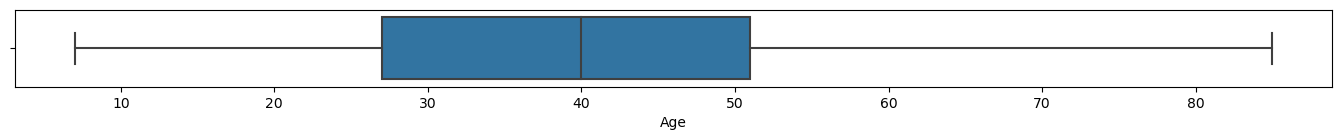

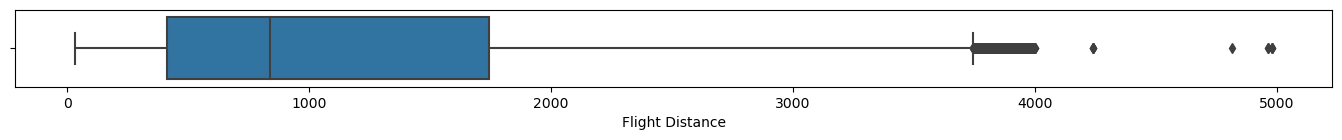

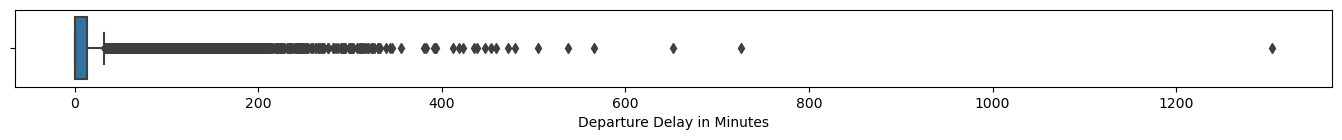

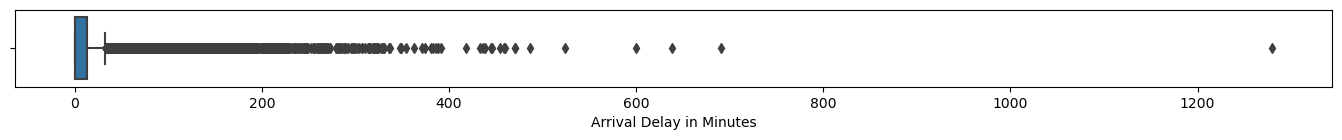

In [22]:
for column in X_train_num:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=X_train_num, x=column)

Berdasarkan pengecekan outlier menggunakan boxplot, terdapat data outlier pada kolom `Flight Distance`, `Derparture Delay in Minutes` dan `Arrival Delay in Minutes`. Namun peneliti memutuskan untuk tidak melakukan handling pada outlier, hal ini dikarenakan sifat outlier yang normal yaitu delay dari suatu penerbanangan baik untuk departure dan arrival tentunya sangat beragam, ada yang delay sangat lama dan ada yang tidak terlalu lama bergantung pada kondisi di daerah tersebut.

In [23]:
high_distance = train[train['Flight Distance'] > 4000]
high_distance.describe(include = ['object'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,10,10,10,10,10
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,satisfied
freq,8,9,8,7,7


 Handling outlier juga tidak dilakukan pada kolom `Flight Distance` dikarenakan jarak penerbangan yang jauh juga hal yang wajar, tergantung dari tipe kelas penerbangan yang digunakan. Berdasarkan analisa, pesawat yang yang melakukan penerbangan jarak jauh merupakan pesawat yang class-nya Business

## Handling Missing Values

In [24]:
total_missing = X_train_num.isna().sum()
percent_missing = (X_train_num.isnull().sum() / len(X_train_num)) * 100
missing_value_X_train_num = pd.DataFrame({'Total Missing': total_missing,
                                          'Missing on percent': percent_missing})

missing_value_X_train_num

,Total Missing,Missing on percent
Age,0,0.000
Flight Distance,0,0.000
Departure Delay in Minutes,0,0.000
Arrival Delay in Minutes,62,0.248


In [25]:
total_missing = X_test_num.isna().sum()
percent_missing = (X_test_num.isnull().sum() / len(X_test_num)) * 100
missing_value_X_test_num = pd.DataFrame({'Total Missing': total_missing,
                                          'Missing on percent': percent_missing})

missing_value_X_test_num

,Total Missing,Missing on percent
Age,0,0.00
Flight Distance,0,0.00
Departure Delay in Minutes,0,0.00
Arrival Delay in Minutes,19,0.38


In [26]:
y_train.isna().sum()

0

In [27]:
y_test.isna().sum()

0

In [28]:
nan_value = train[train['Arrival Delay in Minutes'].isnull()]
nan_value.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
2485,Female,Loyal Customer,28,Personal Travel,Eco,2370,4,5,4,3,...,3,5,4,4,5,4,3,3,NaN,satisfied
2630,Male,Loyal Customer,35,Business travel,Business,1534,1,1,1,1,...,5,5,5,5,5,5,5,0,NaN,satisfied
3621,Male,Loyal Customer,47,Personal Travel,Eco,587,1,2,1,3,...,4,1,1,4,4,4,4,17,NaN,neutral or dissatisfied
4041,Male,Loyal Customer,31,Business travel,Business,2490,1,1,1,1,...,4,3,5,5,4,4,4,6,NaN,satisfied
4490,Male,disloyal Customer,30,Business travel,Eco,737,4,4,4,3,...,2,5,1,4,1,3,2,22,NaN,neutral or dissatisfied


In [29]:
nan_value.tail(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
20665,Female,disloyal Customer,37,Business travel,Business,1371,4,5,5,3,...,3,4,3,4,3,5,3,46,NaN,satisfied
21453,Male,Loyal Customer,53,Personal Travel,Eco,352,4,5,4,3,...,1,4,2,4,4,4,1,30,NaN,neutral or dissatisfied
21794,Male,disloyal Customer,24,Business travel,Eco,1416,2,2,2,4,...,4,1,1,4,1,4,4,0,NaN,neutral or dissatisfied
22202,Female,Loyal Customer,34,Business travel,Business,3303,5,5,5,5,...,4,4,4,4,2,4,3,33,NaN,satisfied
22840,Male,Loyal Customer,50,Business travel,Business,668,3,3,3,3,...,5,5,5,5,5,5,3,4,NaN,satisfied
22939,Male,Loyal Customer,60,Business travel,Business,283,0,0,0,2,...,2,2,2,2,3,2,5,36,NaN,satisfied
22986,Male,Loyal Customer,8,Personal Travel,Eco,1773,1,3,0,3,...,1,2,4,3,1,3,1,0,NaN,neutral or dissatisfied
23033,Male,Loyal Customer,24,Business travel,Business,462,5,5,5,5,...,5,4,5,5,4,2,5,46,NaN,satisfied
23505,Male,Loyal Customer,41,Business travel,Business,2472,3,3,3,3,...,4,4,4,4,4,4,3,86,NaN,satisfied
24180,Female,Loyal Customer,48,Business travel,Business,738,3,3,3,3,...,4,4,4,4,4,4,3,0,NaN,satisfied


In [30]:
nan_value.shape

(62, 23)

In [31]:
nan_value.describe(include = ['object'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,62,62,62,62,62
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,31,54,41,30,32


**Kesimpulan Analisis Missing Values**

- Missing values hanya ditemukan pada data feature train dan test dan tidak ditemukan missing values pada data target.
- Data missing pada kolom `Arrival Delay in Minutes` berkarakteristik MCAR (Missing Completely  at Random) karena data yang missing juga terdapat pada satisfaction yang satisfied maupun neutral or dissatisfied walaupun type customer yang loyal paling banyak memiliki missing values, namun dapat dilihat pula pada kolom lainnya probabilitas missing values terlihat sama untuk setiap barisnya.

> **Imputasi Missing Values**

Karena variabel `Arrival Delay in Minutes` terdistribusi normal, maka metode untuk melakukan missing values handling adalah melakukan imputasi menggunakan mean.

In [32]:
Train_mean_value = X_train_num['Arrival Delay in Minutes'].mean()
Test_mean_value = X_test_num['Arrival Delay in Minutes'].mean()

In [33]:
X_train_num['Arrival Delay in Minutes'].fillna(value=Train_mean_value, inplace=True)
X_test_num['Arrival Delay in Minutes'].fillna(value=Test_mean_value, inplace=True)

In [34]:
X_train_num.isna().sum()

Age                           0
Flight Distance               0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [35]:
X_train_num.isna().sum()

Age                           0
Flight Distance               0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [36]:
normal_new = []
not_normal_new = []

def getNewDataDistribution(df, column):
    stat, p = shapiro(df[column])

    # hasil uji normalitas
    alpha = 0.05
    if p > alpha:
        normal_new.append((column))
    else:
        not_normal_new.append((column))

In [37]:
for column in X_train_num:
    getNewDataDistribution(X_train_num, column)

print(normal_new)
print(not_normal_new)

[]
['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


Handling missing values telah berhasil dilakukan, maka data sudah siap untuk digunakan namun setelah dilakukan missing values handling, data yang awalnya terdistribusi normal, berubah menjadi tidak terdistribusi normal.

In [38]:
X_train_final = pd.concat([X_train_num, X_train_cat_nom, X_train_cat_ord], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat_nom, X_test_cat_ord], axis=1)
X_train_final

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
1,25,235,1,6.0,Male,disloyal Customer,Business travel,Business,3,2,...,1,3,1,1,1,5,3,1,4,1
2,26,1142,0,0.0,Female,Loyal Customer,Business travel,Business,2,2,...,5,5,5,5,4,3,4,4,4,5
3,25,562,11,9.0,Female,Loyal Customer,Business travel,Business,2,5,...,2,2,2,2,2,5,3,1,4,2
4,61,214,0,0.0,Male,Loyal Customer,Business travel,Business,3,3,...,4,5,5,3,3,4,4,3,3,3
5,26,1180,0,0.0,Female,Loyal Customer,Personal Travel,Eco,3,4,...,1,2,1,1,3,4,4,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24996,23,302,28,22.0,Female,disloyal Customer,Business travel,Eco,5,5,...,1,5,1,1,3,3,4,3,4,1
24997,39,3811,310,300.0,Female,Loyal Customer,Business travel,Business,1,1,...,4,4,4,4,3,4,5,4,4,4
24998,47,1187,0,0.0,Male,Loyal Customer,Business travel,Business,4,4,...,4,4,5,5,5,5,5,4,5,4
24999,67,610,103,106.0,Male,Loyal Customer,Personal Travel,Eco Plus,4,5,...,1,4,1,1,5,3,4,3,5,1


## Define Columns Transformer with Pipeline

> **Tentang Scaling**

Scaling digunakan untuk mengubah skala nilai pada fitur atau variabel agar memiliki rentang yang seragam, sehingga tidak ada variabel yang mendominasi variabel lainnya hanya karena rentang nilai yang lebih besar. Hal ini dapat membantu model machine learning untuk belajar lebih baik dan menghasilkan prediksi yang lebih akurat. 

Metode scaling yang digunakan adalah MinMaxScaler, hal ini dikarenakan data tidak terdistribusi normal.

> **Tentang Encoder**

Tujuan dari encoding adalah untuk mengubah data dalam suatu format yang dapat dimengerti oleh mesin atau model machine learning. Data dalam bentuk string atau kategori tidak dapat diolah secara langsung oleh model machine learning, sehingga perlu diubah menjadi format numerik. 

Metode encoder yang digunakan adalah One Hot Encoder, hal ini dikarenakan tipe data yang tidak berurutan seperti variabel nominal dengan beberapa kategori

In [39]:
OneHot = OneHotEncoder()
Scaler = MinMaxScaler()

preprocess = make_column_transformer(
    (OneHot, cat_nominal),
    (Scaler, num_columns),
    remainder='passthrough'
)

* Syntax tersebut akan membuat sebuah objek preprocessor yang berisi dua transformer, yaitu OneHotEncoder dan MinMaxScaler.

* OneHotEncoder akan diaplikasikan pada kolom-kolom kategorikal (nominal), sedangkan MinMaxScaler akan diaplikasikan pada kolom-kolom numerik.

* Kolom-kolom non-numerik yang tidak termasuk dalam kolom-kolom kategorikal dan numerik akan diproses secara langsung dengan parameter `remainder='passthrough'`.

# 6 - Modelling with Default Param


> **Pemilihan Metrics**
* Tujuan kita adalah menurunkan false positive, maka fokus kita sebaiknya pada meningkatkan nilai **precision**. Hal ini karena nilai **precision** menggambarkan seberapa akurat model dalam memprediksi data positif (benar) dibandingkan dengan data negatif (salah), sehingga dengan meningkatkan **precision**, kemungkinan model memprediksi data negatif sebagai positif (false positive) dapat dikurangi.

## Logistic Regression

model score: 0.874 

precison score train set: 0.869
precison score test set: 0.862 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     14053
           1       0.87      0.84      0.85     10947

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

Confusion Matrix      : 


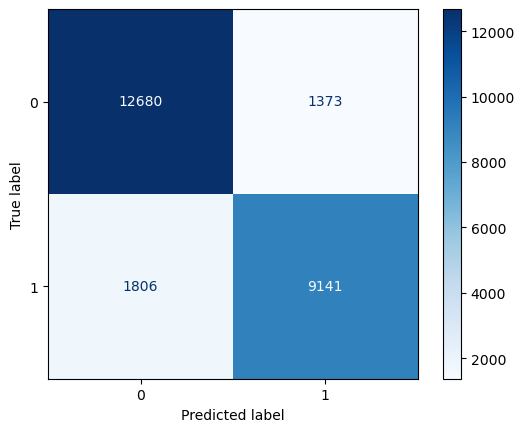

In [40]:
estimator_LG = LogisticRegression()

steps = [
    ('preprocess', preprocess),
    ('clf', estimator_LG)
]

pipeline = Pipeline(steps)
pipeline.fit(X_train_final, y_train)

y_pred_train = pipeline.predict(X_train_final)
y_pred_test = pipeline.predict(X_test_final)

print("model score: %.3f \n" % pipeline.score(X_test_final, y_test))
print('precison score train set: %.3f' % precision_score(y_train, y_pred_train))
print('precison score test set: %.3f \n' % precision_score(y_test, y_pred_test))
print('Classification Report : \n', classification_report(y_train,y_pred_train))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline, X_train_final, y_train, cmap='Blues'))

In [41]:
pred_df = pd.DataFrame({'y': y_test,'y_pred': y_pred_test})
pred_df

,y,y_pred
1,1,1
2,0,0
3,1,0
4,1,0
5,1,1
...,...,...
4996,1,0
4997,1,1
4998,0,0
4999,1,1


> Cross Validation

Cross validation hanya dilakukan pada train set dan tidak dilakukan pada test set. Hal ini dikarenakan test set seharusnya hanya digunakan untuk menguji performa model yang sudah di-train dengan baik pada data yang belum pernah dilihat sebelumnya

In [42]:
precision_LG_train_cross_val = cross_val_score(pipeline, 
                                         X_train_final, 
                                         y_train, 
                                         cv=5, 
                                         scoring='precision')

print('precision Score - All - Cross Validation  : ', precision_LG_train_cross_val)
print('precision Score - Mean - Cross Validation : ', precision_LG_train_cross_val.mean())
print('precision Score - Std - Cross Validation  : ', precision_LG_train_cross_val.std())

precision Score - All - Cross Validation  :  [0.86603774 0.8663227  0.87265738 0.88166828 0.86641221]
precision Score - Mean - Cross Validation :  0.8706196621519314
precision Score - Std - Cross Validation  :  0.0060561513571840055


* Sebelum dilakukan cross validation, precision score pada train set adalah 0.870. Namun, hasil ini belum bisa dijadikan acuan untuk menilai kinerja model karena hanya mengukur performa pada satu dataset saja, sehingga model belum diuji pada dataset lain untuk melihat kemampuannya dalam generalisasi.

* Setelah dilakukan cross validation dengan jumlah 5 fold, didapatkan hasil precision score yang lebih realistis dan bisa diandalkan.

* Dari hasil cross validation tersebut, dapat dilihat bahwa precision score model cenderung stabil pada setiap fold dengan nilai rata-rata sebesar 0.870. Dengan nilai standar deviasi yang cukup kecil, yaitu 0.006, dapat disimpulkan bahwa model memiliki konsistensi yang baik pada setiap iterasinya.

* Meskipun precision score yang didapat lebih rendah dari pada nilai pada train set sebelumnya, namun hasil ini lebih bisa diandalkan karena mampu menghasilkan kinerja model yang lebih realistis dan general pada data yang berbeda-beda.

## K Neighbors Classifier

model score: 0.926
precison score train set: 0.962
precison score test set: 0.940 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     14053
           1       0.96      0.91      0.93     10947

    accuracy                           0.94     25000
   macro avg       0.95      0.94      0.94     25000
weighted avg       0.94      0.94      0.94     25000

Confusion Matrix      : 


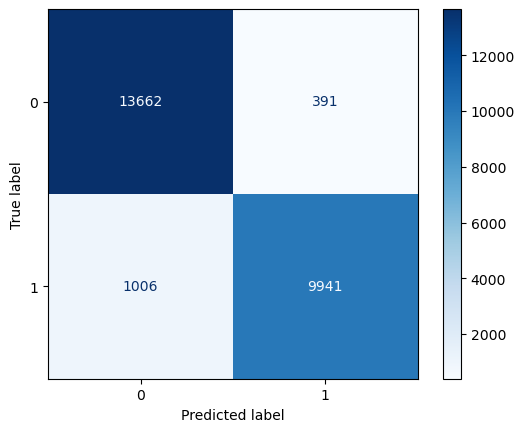

In [43]:
estimator_KNN = KNeighborsClassifier()

steps = [
    ('preprocess', preprocess),
    ('clf', estimator_KNN)
]

pipeline = Pipeline(steps)
pipeline.fit(X_train_final, y_train)

y_pred_train = pipeline.predict(X_train_final)
y_pred_test = pipeline.predict(X_test_final)

print("model score: %.3f" % pipeline.score(X_test_final, y_test))
print('precison score train set: %.3f' % precision_score(y_train, y_pred_train))
print('precison score test set: %.3f \n' % precision_score(y_test, y_pred_test))
print('Classification Report : \n', classification_report(y_train,y_pred_train))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline, X_train_final, y_train, cmap='Blues'))

In [44]:
precision_KNN_train_cross_val = cross_val_score(pipeline, 
                                         X_train_final, 
                                         y_train, 
                                         cv=5, 
                                         scoring='precision')

print('precision Score - All - Cross Validation  : ', precision_KNN_train_cross_val)
print('precision Score - Mean - Cross Validation : ', precision_KNN_train_cross_val.mean())
print('precision Score - Std - Cross Validation  : ', precision_KNN_train_cross_val.std())

precision Score - All - Cross Validation  :  [0.92474674 0.94305351 0.93976494 0.94660679 0.93451502]
precision Score - Mean - Cross Validation :  0.9377373987820548
precision Score - Std - Cross Validation  :  0.007618121071769304


* Sebelum dilakukan cross validation, precision score pada train set adalah 0.962. Namun, hasil ini belum bisa dijadikan acuan untuk menilai kinerja model karena hanya mengukur performa pada satu dataset saja, sehingga model belum diuji pada dataset lain untuk melihat kemampuannya dalam generalisasi.

* Setelah dilakukan cross validation dengan jumlah 5 fold , didapatkan hasil precision score yang lebih realistis dan bisa diandalkan.

* Dari hasil cross validation tersebut, dapat dilihat bahwa precision score model cenderung stabil pada setiap fold dengan nilai rata-rata sebesar 0.937. Dengan nilai standar deviasi yang cukup kecil, yaitu 0.007, dapat disimpulkan bahwa model memiliki konsistensi yang baik pada setiap iterasinya

* Meskipun precision score yang didapat lebih rendah dari pada nilai pada train set sebelumnya, namun hasil ini lebih bisa diandalkan karena mampu menghasilkan kinerja model yang lebih realistis dan general pada data yang berbeda-beda.

## Decision Tree Classifier

model score: 0.935
precison score train set: 1.000
precison score test set: 0.922 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14053
           1       1.00      1.00      1.00     10947

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

Confusion Matrix      : 


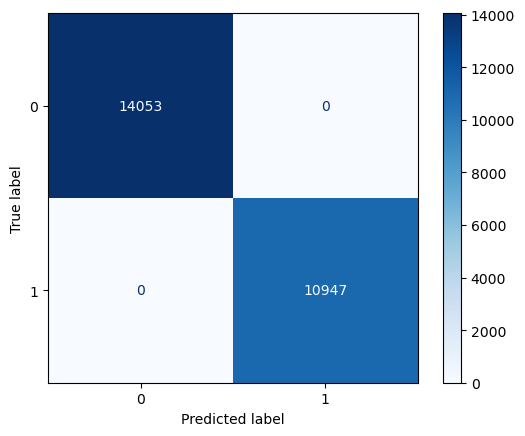

In [45]:
estimator_DT = DecisionTreeClassifier()

steps = [
    ('preprocess', preprocess),
    ('clf', estimator_DT)
]

pipeline = Pipeline(steps)
pipeline.fit(X_train_final, y_train)

y_pred_train = pipeline.predict(X_train_final)
y_pred_test = pipeline.predict(X_test_final)

print("model score: %.3f" % pipeline.score(X_test_final, y_test))
print('precison score train set: %.3f' % precision_score(y_train, y_pred_train))
print('precison score test set: %.3f \n' % precision_score(y_test, y_pred_test))
print('Classification Report : \n', classification_report(y_train,y_pred_train))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline, X_train_final, y_train, cmap='Blues'))

In [46]:
precision_DT_train_cross_val = cross_val_score(pipeline, 
                                         X_train_final, 
                                         y_train, 
                                         cv=5, 
                                         scoring='precision')

print('precision Score - All - Cross Validation  : ', precision_DT_train_cross_val)
print('precision Score - Mean - Cross Validation : ', precision_DT_train_cross_val.mean())
print('precision Score - Std - Cross Validation  : ', precision_DT_train_cross_val.std())

precision Score - All - Cross Validation  :  [0.91681655 0.91696915 0.92800743 0.92400371 0.91872146]
precision Score - Mean - Cross Validation :  0.9209036587164858
precision Score - Std - Cross Validation  :  0.004405013970935323


* Sebelum dilakukan cross validation, precision score pada train set adalah 1.000. Namun, hasil ini belum bisa dijadikan acuan untuk menilai kinerja model karena hanya mengukur performa pada satu dataset saja, sehingga model belum diuji pada dataset lain untuk melihat kemampuannya dalam generalisasi.

* Setelah dilakukan cross validation dengan jumlah 5 fold, didapatkan hasil precision score yang lebih realistis dan bisa diandalkan.

* Dari hasil cross validation tersebut, dapat dilihat bahwa precision score model cenderung stabil pada setiap fold dengan nilai rata-rata sebesar 0.918. Dengan nilai standar deviasi yang kecil, yaitu 0.003, dapat disimpulkan bahwa model memiliki konsistensi yang baik pada setiap iterasinya. 

* Meskipun precision score yang didapat lebih rendah dari pada nilai pada train set sebelumnya, namun hasil ini lebih bisa diandalkan karena mampu menghasilkan kinerja model yang lebih realistis dan general pada data yang berbeda-beda.

## Random Forest Classifier

model score: 0.956
precison score train set: 1.000
precison score test set: 0.961 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14053
           1       1.00      1.00      1.00     10947

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

Confusion Matrix      : 


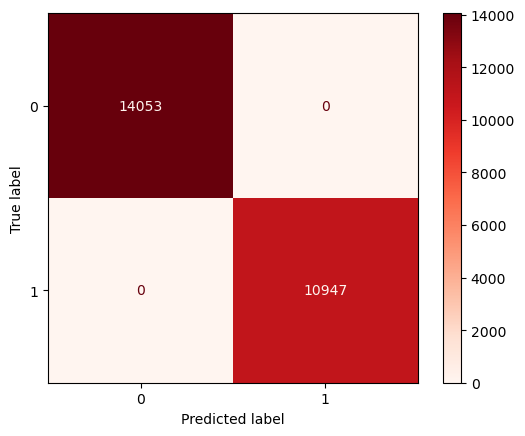

In [47]:
estimator_RF = RandomForestClassifier()

steps = [
    ('preprocess', preprocess),
    ('clf', estimator_RF)
]

pipeline = Pipeline(steps)
pipeline.fit(X_train_final, y_train)

y_pred_train = pipeline.predict(X_train_final)
y_pred_test = pipeline.predict(X_test_final)

print("model score: %.3f" % pipeline.score(X_test_final, y_test))
print('precison score train set: %.3f' % precision_score(y_train, y_pred_train))
print('precison score test set: %.3f \n' % precision_score(y_test, y_pred_test))
print('Classification Report : \n', classification_report(y_train,y_pred_train))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline, X_train_final, y_train, cmap='Reds'))

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2815
           1       0.96      0.94      0.95      2185

    accuracy                           0.96      5000
   macro avg       0.96      0.95      0.96      5000
weighted avg       0.96      0.96      0.96      5000

Confusion Matrix      : 


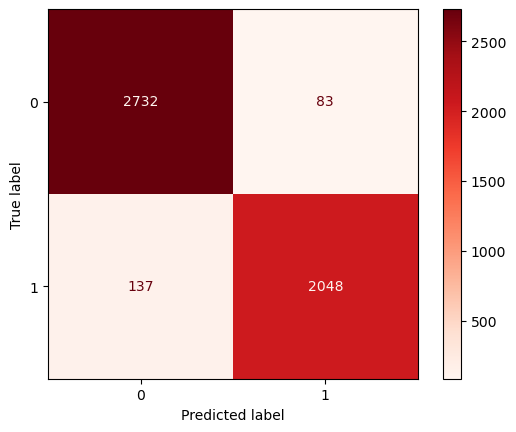

In [48]:
print('Classification Report : \n', classification_report(y_test,y_pred_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline, X_test_final, y_test, cmap='Reds'))

In [49]:
precision_RF_train_cross_val = cross_val_score(pipeline, 
                                         X_train_final, 
                                         y_train, 
                                         cv=5, 
                                         scoring='precision')

print('precision Score - All - Cross Validation  : ', precision_RF_train_cross_val)
print('precision Score - Mean - Cross Validation : ', precision_RF_train_cross_val.mean())
print('precision Score - Std - Cross Validation  : ', precision_RF_train_cross_val.std())

precision Score - All - Cross Validation  :  [0.95571096 0.95812006 0.95784543 0.97234144 0.96198968]
precision Score - Mean - Cross Validation :  0.9612015122334204
precision Score - Std - Cross Validation  :  0.005926618716179624


* Hasil precision score yang tinggi pada setiap fold menunjukkan bahwa model yang dibangun memiliki performa yang baik dan mampu mengklasifikasikan data dengan akurat pada setiap iterasi cross validation. Selain itu, rata-rata precision score yang cukup tinggi, yaitu sekitar 0.963, menunjukkan bahwa model memiliki performa yang baik pada dataset yang digunakan.

* Sementara itu, hasil standar deviasi precision score yang rendah menunjukkan bahwa nilai precision score pada setiap fold tidak memiliki perbedaan yang signifikan dan cenderung stabil.

* Secara keseluruhan, hasil precision score yang tinggi, rata-rata precision score yang baik, serta standar deviasi precision score yang rendah menunjukkan bahwa model yang dibangun mampu mengklasifikasikan data dengan akurat dan stabil pada setiap iterasinya. 

In [50]:
pred_df = pd.DataFrame({'y': y_test,'y_pred': y_pred_test})
pred_df

,y,y_pred
1,1,1
2,0,0
3,1,1
4,1,0
5,1,1
...,...,...
4996,1,1
4997,1,1
4998,0,0
4999,1,1


In [51]:
test['predicted'] = y_pred_test

In [52]:
test[test['predicted'] == 0]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,predicted
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,0
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,4,2,4,0,20.0,satisfied,0
11,Female,Loyal Customer,33,Business travel,Business,325,2,5,5,5,...,2,2,2,3,2,4,18,7.0,neutral or dissatisfied,0
15,Male,Loyal Customer,50,Personal Travel,Eco,83,3,4,0,3,...,4,2,4,4,5,2,5,2.0,neutral or dissatisfied,0
16,Female,Loyal Customer,31,Business travel,Eco,728,2,5,5,5,...,4,3,3,4,3,2,2,0.0,neutral or dissatisfied,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,Female,Loyal Customer,31,Business travel,Business,3702,4,5,4,4,...,2,3,1,1,2,4,71,69.0,neutral or dissatisfied,0
4992,Female,Loyal Customer,52,Personal Travel,Eco,2449,3,3,2,1,...,2,5,4,3,2,3,2,6.0,neutral or dissatisfied,0
4993,Female,disloyal Customer,25,Business travel,Eco,759,3,4,4,4,...,3,1,3,1,3,4,0,0.0,neutral or dissatisfied,0
4994,Female,Loyal Customer,41,Personal Travel,Eco Plus,746,3,5,3,4,...,3,3,3,5,3,4,4,28.0,neutral or dissatisfied,0


## AdaBoost Classifier

model score: 0.928
precison score train set: 0.922
precison score test set: 0.924 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     14053
           1       0.92      0.91      0.91     10947

    accuracy                           0.93     25000
   macro avg       0.93      0.92      0.92     25000
weighted avg       0.93      0.93      0.93     25000

Confusion Matrix      : 


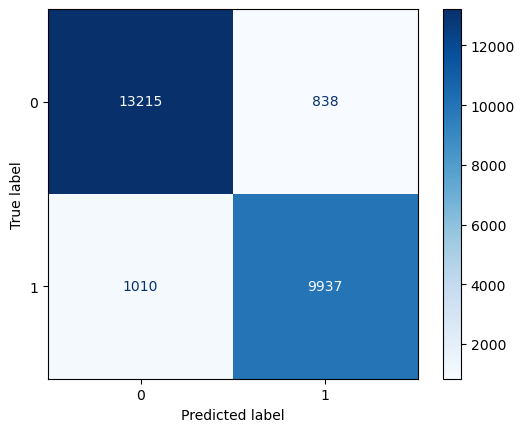

In [53]:
estimator_AB = AdaBoostClassifier()

steps = [
    ('preprocess', preprocess),
    ('clf', estimator_AB)
]

pipeline = Pipeline(steps)
pipeline.fit(X_train_final, y_train)

y_pred_train = pipeline.predict(X_train_final)
y_pred_test = pipeline.predict(X_test_final)

print("model score: %.3f" % pipeline.score(X_test_final, y_test))
print('precison score train set: %.3f' % precision_score(y_train, y_pred_train))
print('precison score test set: %.3f \n' % precision_score(y_test, y_pred_test))
print('Classification Report : \n', classification_report(y_train,y_pred_train))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline, X_train_final, y_train, cmap='Blues'))

In [54]:
precision_AB_train_cross_val = cross_val_score(pipeline, 
                                         X_train_final, 
                                         y_train, 
                                         cv=5, 
                                         scoring='precision')

print('precision Score - All - Cross Validation  : ', precision_AB_train_cross_val)
print('precision Score - Mean - Cross Validation : ', precision_AB_train_cross_val.mean())
print('precision Score - Std - Cross Validation  : ', precision_AB_train_cross_val.std())

precision Score - All - Cross Validation  :  [0.90863408 0.91979601 0.92091954 0.93661306 0.92207186]
precision Score - Mean - Cross Validation :  0.9216069100786914
precision Score - Std - Cross Validation  :  0.00891567999949385


* Hasil precision score dari cross validation menunjukkan bahwa model yang dibangun memiliki performa yang bervariasi pada setiap fold. Meskipun nilai precision score rata-ratanya cukup tinggi, yaitu sekitar 0.921, namun terdapat perbedaan nilai yang cukup signifikan pada setiap fold.

* Sementara itu, hasil standar deviasi precision score yang diperoleh sebesar 0.008 menunjukkan bahwa nilai precision score pada setiap fold memiliki variasi atau perbedaan yang tidak terlalu besar, sehingga model dapat dikatakan memiliki performa yang stabil dan konsisten pada setiap fold dalam cross validation.

## Gradient Boosting Classifier

model score: 0.942
precison score train set: 0.945
precison score test set: 0.945 

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     14053
           1       0.95      0.92      0.93     10947

    accuracy                           0.94     25000
   macro avg       0.94      0.94      0.94     25000
weighted avg       0.94      0.94      0.94     25000

Confusion Matrix      : 


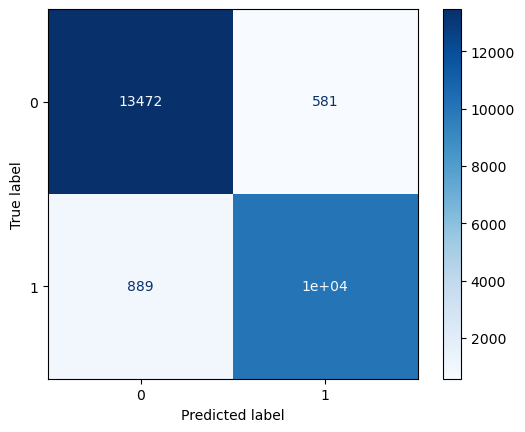

In [55]:
estimator_GB = GradientBoostingClassifier()

steps = [
    ('preprocess', preprocess),
    ('clf', estimator_GB)
]

pipeline = Pipeline(steps)
pipeline.fit(X_train_final, y_train)

y_pred_train = pipeline.predict(X_train_final)
y_pred_test = pipeline.predict(X_test_final)

print("model score: %.3f" % pipeline.score(X_test_final, y_test))
print('precison score train set: %.3f' % precision_score(y_train, y_pred_train))
print('precison score test set: %.3f \n' % precision_score(y_test, y_pred_test))
print('Classification Report : \n', classification_report(y_train,y_pred_train))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline, X_train_final, y_train, cmap='Blues'))

In [56]:
precision_GB_train_cross_val = cross_val_score(pipeline, 
                                         X_train_final, 
                                         y_train, 
                                         cv=5, 
                                         scoring='precision')

print('precision Score - All - Cross Validation  : ', precision_GB_train_cross_val)
print('precision Score - Mean - Cross Validation : ', precision_GB_train_cross_val.mean())
print('precision Score - Std - Cross Validation  : ', precision_GB_train_cross_val.std())

precision Score - All - Cross Validation  :  [0.93706294 0.94741784 0.94219925 0.95247148 0.93899578]
precision Score - Mean - Cross Validation :  0.9436294570158497
precision Score - Std - Cross Validation  :  0.005642144020201756


* Hasil precision score dari cross validation menunjukkan bahwa model yang dibangun memiliki performa yang konsisten pada setiap fold dengan nilai yang relatif stabil. Dalam hal ini, nilai precision score yang diperoleh cenderung tinggi dan berada dalam kisaran 0.93 hingga 0.95 dengan rata-rata 0.94.

* Dengan standar deviasi yang rendah, yaitu sebesar 0.005, dapat diartikan bahwa nilai precision score pada setiap fold cenderung berada pada rentang yang sempit dan tidak terlalu jauh dari nilai rata-ratanya. Hal ini menunjukkan bahwa model yang dibangun memiliki performa yang stabil dan konsisten pada setiap fold dalam cross validation.

## **Precision Score Reports**

In [57]:
# Save Precision precision Report into a Dictionary

all_reports = {}
precision_reports = {
    'Logistic Regression'   : precision_LG_train_cross_val.mean(),
    'KNN'                   : precision_KNN_train_cross_val.mean(),
    'Decision Tree'         : precision_DT_train_cross_val.mean(),
    'Random Forest'         : precision_RF_train_cross_val.mean(),
    'Adaboost'              : precision_AB_train_cross_val.mean(),
    'Gradient Boosting'     : precision_GB_train_cross_val.mean()
}

all_reports['precision score mean'] = precision_reports
pd.DataFrame(all_reports)

,precision score mean
Adaboost,0.921607
Decision Tree,0.920904
Gradient Boosting,0.943629
KNN,0.937737
Logistic Regression,0.870620
Random Forest,0.961202


Berdasarkan hasil evaluasi model dengan menggunakan precision score, Random Forest mendapatkan nilai tertinggi yaitu 0.962610. Hal ini menunjukkan bahwa model Random Forest mampu memberikan prediksi yang lebih akurat dibandingkan dengan model lainnya dalam membedakan antara kelas positif dan negatif.

Dalam konteks machine learning, precision score merupakan salah satu metrik evaluasi untuk mengukur kemampuan model dalam mengenali dan membedakan antara kelas positif dan negatif. Semakin tinggi nilai precision score, semakin baik kinerja model dalam memprediksi kelas positif tanpa banyak melakukan kesalahan dalam memprediksi kelas negatif.

Dengan nilai precision score sebesar 0.962610, model Random Forest dapat dianggap sebagai model yang handal dan efektif dalam melakukan klasifikasi pada dataset yang digunakan. Oleh karena itu, model Random Forest dapat dijadikan pilihan yang tepat untuk diimplementasikan pada kasus-kasus di dunia nyata yang memerlukan prediksi yang akurat dan dapat diandalkan.

# 7 - Tuning

* Hyperparameter tuning adalah proses pengaturan nilai parameter-parameter tersebut sehingga model dapat bekerja lebih baik pada dataset yang diberikan. Hal ini dapat dilakukan dengan mencoba berbagai kombinasi nilai parameter untuk mencari kombinasi yang terbaik. Selain itu, hyperparameter tuning dilakukan dengan tujuan untuk meningkatkan performa dan kinerja model machine learning.

* Dengan melakukan hyperparameter tuning, model machine learning dapat menemukan parameter-parameter yang optimal sehingga dapat meningkatkan akurasi, presisi, recall, atau metric lainnya yang digunakan sebagai evaluasi model.

* Dalam beberapa kasus, tanpa melakukan hyperparameter tuning, model yang dibangun mungkin tidak mampu memberikan hasil yang optimal atau bahkan dapat mengalami overfitting atau underfitting. Oleh karena itu, hyperparameter tuning menjadi salah satu langkah penting dalam pembuatan model machine learning untuk mencapai performa yang lebih baik dan dapat diandalkan.


In [58]:
estimator_RF = RandomForestClassifier()

steps = [
    ('preprocess', preprocess),
    ('clf', estimator_RF)
]

pipeline_RF_tuning = Pipeline(steps)
pipeline_RF_tuning

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in '
                                                   'Minutes'])])),
                ('clf', RandomForestClassifier())])

* Syntax tersebut digunakan untuk membuat sebuah pipeline yang terdiri dari dua tahapan yaitu `preprocess` dan `clf`. Tahapan pertama, `preprocess`, menggunakan `make_column_transformer` yang berisi transformasi data menggunakan `OneHotEncoder` dan `MinMaxScaler`. Kemudian, tahapan kedua clf menggunakan estimator `RandomForestClassifier()`.

* Dengan menggunakan pipeline, kita dapat melakukan preprocessing dengan mudah dan menghindari kebocoran data yang mungkin terjadi jika kita melakukan transformasi pada setiap tahapan secara terpisah.

In [59]:
#Create a dictionary and fill out some parameters 
grid_params = dict(
    clf__criterion = ['gini', 'entropy', 'log_loss'],
    clf__max_depth = [int(x) for x in range(2,6)],
    clf__min_samples_split = [int(x) for x in range(2,6)],
    clf__min_samples_leaf = [int(x) for x in range(1,6)],
    clf__max_features = ['sqrt', 'log2', 'None']
)

* Syntax tersebut membuat sebuah dictionary yang berisi beberapa parameter yang akan diuji dalam proses grid search pada sebuah model klasifikasi Random Forest yang sudah di-define sebelumnya pada sebuah pipeline

> **Grid Search**

Melakukan Grid Search Cross Validation pada sebuah Pipeline yang menggunakan algoritma Random Forest Classifier yang bertujuan mencari hyperparameter yang optimal untuk model sehingga dapat meningkatkan performa dari model tersebut.

In [64]:
#  melakukan grid search dengan cross validation pada model random forest yang telah dibuat sebelumnya menggunakan pipeline

RF_grid = GridSearchCV(pipeline_RF_tuning,
                        grid_params,
                        verbose = 3,
                        refit = True,
                        scoring = 'precision',
                        cv = 5,
                        return_train_score = True,
                        n_jobs = -1)

RF_grid.fit(X_train_final, y_train)
RF_grid.best_params_    

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


{'clf__criterion': 'entropy',
 'clf__max_depth': 5,
 'clf__max_features': 'log2',
 'clf__min_samples_leaf': 4,
 'clf__min_samples_split': 2}

hyperparameter terbaik adalah:

* criterion : entropy
* max_depth : 5
* max_features : log2
* min_samples_leaf : 2
* min_samples_split : 4.

In [65]:
# Syntax di bawah ini akan menampilkan daftar parameter yang dapat diatur pada objek grid search RF_grid

for param in RF_grid.get_params().keys():
    print(param)

cv
error_score
estimator__memory
estimator__steps
estimator__verbose
estimator__preprocess
estimator__clf
estimator__preprocess__n_jobs
estimator__preprocess__remainder
estimator__preprocess__sparse_threshold
estimator__preprocess__transformer_weights
estimator__preprocess__transformers
estimator__preprocess__verbose
estimator__preprocess__verbose_feature_names_out
estimator__preprocess__onehotencoder
estimator__preprocess__minmaxscaler
estimator__preprocess__onehotencoder__categories
estimator__preprocess__onehotencoder__drop
estimator__preprocess__onehotencoder__dtype
estimator__preprocess__onehotencoder__handle_unknown
estimator__preprocess__onehotencoder__sparse
estimator__preprocess__minmaxscaler__clip
estimator__preprocess__minmaxscaler__copy
estimator__preprocess__minmaxscaler__feature_range
estimator__clf__bootstrap
estimator__clf__ccp_alpha
estimator__clf__class_weight
estimator__clf__criterion
estimator__clf__max_depth
estimator__clf__max_features
estimator__clf__max_leaf_nod

In [66]:
print(RF_grid.best_estimator_)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in '
                                                   'Minutes'])])),
                ('clf',
                 RandomForestClassifier(criterion='entropy', max_depth=5,
                                        max_features='log2',
                              

In [67]:
RF_Grid_CV_best = RF_grid.best_estimator_   

In [68]:
y_pred_train_RF_tuned = RF_Grid_CV_best.predict(X_train_final)
y_pred_test_RF_tuned = RF_Grid_CV_best.predict(X_test_final)

Precision Score - Train Set   :  0.9157677516180471 

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     14053
           1       0.92      0.89      0.90     10947

    accuracy                           0.92     25000
   macro avg       0.92      0.91      0.92     25000
weighted avg       0.92      0.92      0.92     25000
 

Confusion Matrix      : 


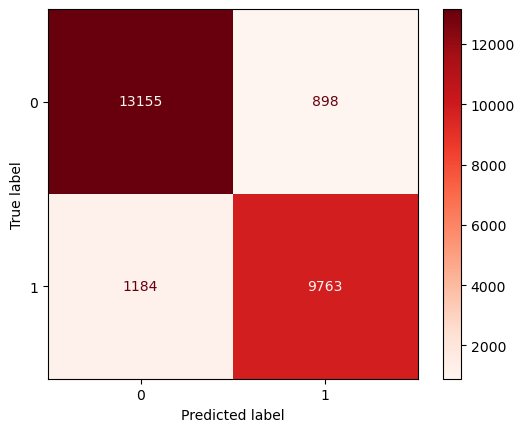

In [69]:
# Check Performance Model against Train-Set

print('Precision Score - Train Set   : ', precision_score(y_train, y_pred_train_RF_tuned), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_RF_tuned), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(RF_Grid_CV_best, X_train_final, y_train, cmap='Reds'))

> **Classification Report Train set**

Pada kasus ini, kelas 0 merepresentasikan kategori netral atau tidak puas, sedangkan kelas 1 merepresentasikan kategori puas. Oleh karena itu, interpretasi hasil classification report pada kasus ini adalah sebagai berikut:

* **Precision**: Nilai precision menunjukkan seberapa baik model dalam memprediksi data dengan benar pada suatu kelas tertentu. Precision kelas 0 sebesar 0.91, artinya 91% dari data yang diprediksi sebagai kelas 0 (netral/tidak puas) adalah benar-benar kelas 0 (netral/tidak puas). Precision kelas 1 sebesar 0.92, artinya 92% dari data yang diprediksi sebagai kelas 1 (puas) adalah benar-benar kelas 1 (puas).

* **Recall**: Nilai recall menunjukkan seberapa baik model dalam mengklasifikasikan suatu kelas pada data yang benar-benar termasuk dalam kelas tersebut. Recall kelas 0 sebesar 0.94, artinya model dapat mengklasifikasikan 94% data yang benar-benar termasuk dalam kelas 0 (netral/tidak puas). Recall kelas 1 sebesar 0.87, artinya model dapat mengklasifikasikan 87% data yang benar-benar termasuk dalam kelas 1 (puas).

* **F1-score**: Nilai f1-score adalah harmonic mean dari precision dan recall. F1-score kelas 0 sebesar 0.92, dan f1-score kelas 1 sebesar 0.89.

* **Accuracy**: Nilai akurasi menunjukkan seberapa baik model dapat mengklasifikasikan secara benar seluruh data. Pada kasus ini, nilai akurasi sebesar 0.91, artinya model dapat mengklasifikasikan dengan benar 91% data pada keseluruhan data train.

---

> **Confusion Matrix Train set**

- **True Positive (TP):** model memprediksi 9570 orang yang puas dengan layanan airlane dan memang kenyataannya mereka puas.
- **True Negative (TN):** model memprediksi 13.714 orang yang tidak puas atau netral dengan layanan airlane dan memang kenyataannya mereka tidak puas atau netral.
- **False Positive (FP):** model memprediksi 879 orang yang puas dengan layanan airlane, padahal kenyataan mereka tidak puas atau netral.
- **False Negative (FN):** model memprediksi 1.377 orang yang tidak puas atau netral dengan layanan airlane, padahal kenyataannya mereka puas.





Precision Score - Test Set   :  0.9121590383726306 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2815
           1       0.91      0.90      0.91      2185

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000
 

Confusion Matrix      : 


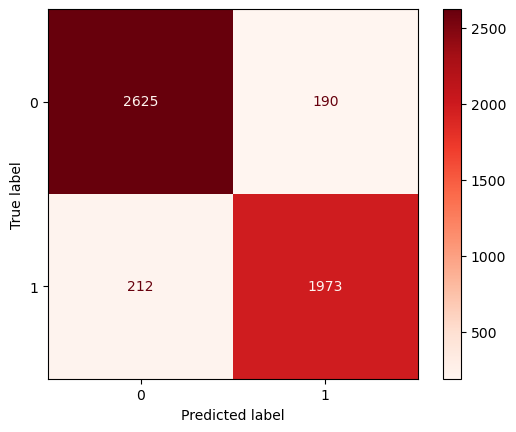

In [70]:
# Check Performance Model against test-Set

print('Precision Score - Test Set   : ', precision_score(y_test, y_pred_test_RF_tuned), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_RF_tuned), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(RF_Grid_CV_best, X_test_final, y_test, cmap='Reds'))

> **Classification Report Test set**

Pada kasus ini, kelas 0 merepresentasikan kategori netral atau tidak puas, sedangkan kelas 1 merepresentasikan kategori puas. Oleh karena itu, interpretasi hasil classification report pada kasus ini adalah sebagai berikut:

* **Precision**: Precision kelas 0 sebesar 0.91, yang artinya dari seluruh data yang diprediksi sebagai tidak puas, 91% benar-benar termasuk dalam kelas tidak puas. Precision kelas 1 sebesar 0.91, yang artinya dari seluruh data yang diprediksi sebagai puas, 91% benar-benar termasuk dalam kelas puas.

* **Recall**: Recall kelas 0 sebesar 0.94, yang artinya dari seluruh data yang termasuk dalam kelas tidak puas, model berhasil memprediksi 94% data tersebut dengan benar. Recall kelas 1 sebesar 0.88, yang artinya dari seluruh data yang termasuk dalam kelas puas, model berhasil memprediksi 88% data tersebut dengan benar.

* **F1-score**: Nilai f1-score adalah harmonic mean dari precision dan recall. F1-score kelas 0 sebesar 0.92, dan f1-score kelas 1 sebesar 0.90.

* **Accuracy**: Accuracy sebesar 0.91, yang merupakan rata-rata dari benar prediksi kelas tidak puas dan puas.

---

> **Confusion Matrix Test set**

- **True Positive (TP):** model memprediksi 1922 orang yang puas dengan layanan airlane dan memang kenyataannya mereka puas.
- **True Negative (TN):** model memprediksi 2634 orang yang tidak puas atau netral dengan layanan airlane dan memang kenyataannya mereka tidak puas atau netral.
- **False Positive (FP):** model memprediksi 181 orang yang puas dengan layanan airlane, padahal kenyataan mereka tidak puas atau netral.
- **False Negative (FN):** model memprediksi 263 orang yang tidak puas atau netral dengan layanan airlane, padahal kenyataannya mereka puas.



> **Precision Score for Random Forest with Hyperparameter Tuning**
* Precision Score - Train Set  :  0.915
* Precision Score - Test Set   :  0.913

Dari hasil evaluasi model yang dilakukan menggunakan precision score, dapat disimpulkan bahwa model memiliki kemampuan yang baik dalam memprediksi data dengan benar pada kelas netral/tidak puas dan kelas puas, dengan nilai precision yang cukup tinggi pada kelas 0 (netral/tidak puas) dan kelas 1 (puas). Nilai precision pada train set dan test set juga relatif sama, menunjukkan bahwa model tidak mengalami overfitting atau underfitting.

In [71]:
# RF_Best = RandomForestClassifier(criterion='entropy', 
#                                  max_depth=5,
#                                  max_features='sqrt', 
#                                  min_samples_split=5)

# 8 - Model Evaluation

> **Based on Precision Score**

1. Before Tuning
* Precision Score - Train Set  : 0.962
* Precision Score - Test Set   : 0.961 

2. After Tuning
* Precision Score - Train Set  :  0.915
* Precision Score - Test Set   :  0.913

Berdasarkan nilai precision score, sebelum dilakukan hyperparameter tuning, model Random Forest memiliki nilai precision yang cukup tinggi pada kedua set data train dan test, yaitu sebesar 0.962 dan 0.961 secara berturut-turut. Namun, setelah dilakukan hyperparameter tuning, nilai precision score pada kedua set data tersebut mengalami penurunan menjadi 0.915 dan 0.913.

Meskipun model sebelum tuning memiliki nilai precision yang lebih tinggi, namun peningkatan kinerja model yang diperoleh setelah hyperparameter tuning tidak terlalu signifikan. Oleh karena itu, dapat disimpulkan bahwa pada kasus ini, hyperparameter tuning tidak memberikan dampak yang signifikan terhadap peningkatan nilai precision pada model Random Forest.

# 9 - Kesimpulan

> **Based on EDA**

1. Dataset didominasi oleh data categoric ordinal
2. Berdasarkan uji normalitas shapiro test, didapatkan terdapat kolom munerik yang terdistribusi normal yaitu kolom `Arrival Delay in Minutes` dan tidak terdistribusi normal yaitu kolom `Age`, `Flight Distance`, `Departure Delay in Minutes`

> **Model Evaluation**

1. Berdasarkan hasil evaluasi model dengan menggunakan precision score dan teknik cross validation, Random Forest mendapatkan nilai tertinggi yaitu 0.962610 dibandingkan dengan model klasifikasi lainnya. Hal ini menunjukkan bahwa model Random Forest mampu memberikan prediksi yang lebih akurat dibandingkan dengan model lainnya dalam membedakan antara kelas positif dan negatif.
2. Meskipun model sebelum tuning memiliki nilai precision yang lebih tinggi, namun model setelah tuning dapat dianggap lebih baik karena lebih general dan lebih stabil dalam mengklasifikasikan data baru. Oleh karena itu, model yang setelah dilakukan hyperparameter tuning bisa dipilih sebagai model yang terbaik dalam hal meningkatkan keakuratan dan konsistensi dalam mengklasifikasikan data baru.

> **Futher Improvement**

1. Perlu dipertimbangkan juga untuk faktor lain seperti biaya yang dikeluarkan untuk mengurangi false positive. Jika biaya yang dikeluarkan sangat tinggi, maka model sebelum dilakukan tuning mungkin lebih diinginkan. Oleh karena itu, dalam memilih model terbaik, perlu dilakukan trade-off antara nilai precision, recall, biaya, dan faktor lain yang relevan.

# 10 - Model Saving

In [73]:
# Save the Files

with open('satisfication_model.pkl', 'wb') as file_1:
  pickle.dump(RF_Grid_CV_best, file_1)

with open('list_num_cols.txt', 'w') as file_2:
  json.dump(num_columns, file_2)

with open('list_cat_nom.txt','w') as file_3: 
  json.dump(cat_nominal, file_3)

with open('list_cat_ord.txt','w') as file_4: 
  json.dump(cat_ordinal, file_4)